In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [7]:
model = Sequential([Flatten(),
                   Dense(128, activation = tf.nn.relu),
                    Dense(10, activation = tf.nn.softmax)])

In [8]:
model.compile(optimizer= tf.optimizers.Adam(), loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(training_images, training_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4967 - accuracy: 0.8256
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3729 - accuracy: 0.8658
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3372 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3119 - accuracy: 0.8866
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2928 - accuracy: 0.8919
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2793 - accuracy: 0.8975
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2667 - accuracy: 0.9017
Epoch 8/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2577 - accuracy: 0.9054
Epoch 9/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2466 - accuracy: 0.9068
Epoch 10/10
60000/60000 [============

In [10]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.3291 - accuracy: 0.8852


[0.3290811027646065, 0.8852]

2


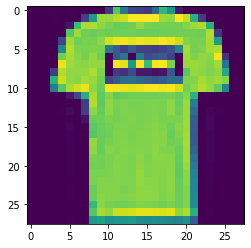

In [11]:
classifications = model.predict(test_images)
plt.imshow(training_images[1])
print(test_labels[1])

# callback to end early training

In [19]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.4:
            print("\nending traning!!!")
            self.model.stop_training = True


In [20]:
callbacks = mycallback()
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
59712/60000 [============================>.] - ETA: 0s - loss: 0.2071 - accuracy: 0.9215
ending traning!!!
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2073 - accuracy: 0.9214


In [21]:
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3462 - accuracy: 0.8842
